initial Hidden Weights:
[[0.7 3.3]
 [4.2 3.9]]

initial Output Weights:
[[2.4]
 [3.5]]


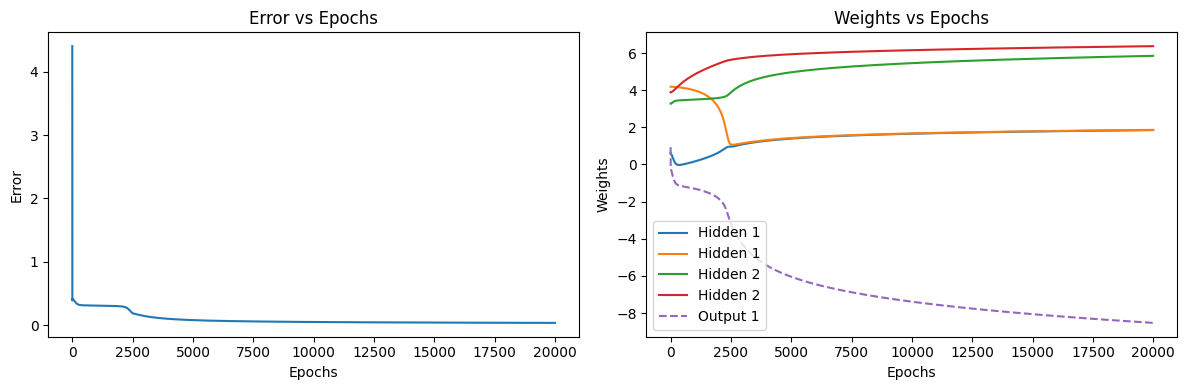

[0, 0] [-0.07244464] [-0.]
[0, 1] [0.98849435] [1.]
[1, 0] [0.98858022] [1.]
[1, 1] [0.05825752] [0.]
Final Hidden Weights:
[[1.85175559 5.8503015 ]
 [1.86162163 6.37052474]]

Final Output Weights:
[[-8.53227801]
 [ 8.38738873]]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

def outputDetector(actual_output):
  # Find the minimum and maximum values
  min_value = min(actual_output)
  max_value = max(actual_output)

  # Create a new array with corresponding elements
  new_array = [0 if element == min_value else 1 if element == max_value else element for element in actual_output]

  return new_array
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1.0 - x)



epochs = 20000
input_size, hidden_size, output_size = 2, 2, 1
learning_rate = 0.1

# Truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Set the bounds for the uniform distribution
lower_bound = -5
upper_bound = 5

# Fill hidden and output layers with random values.
w_hidden = np.round(np.random.uniform(lower_bound, upper_bound, size=(input_size, hidden_size)), 1)
w_output = np.round(np.random.uniform(lower_bound, upper_bound, size=(hidden_size, output_size)), 1)
# Print final weights
print("initial Hidden Weights:")
print(w_hidden)

print("\ninitial Output Weights:")
print(w_output)
# Lists to store errors, hidden weights, and output weights for each epoch
errors = []
hidden_weights_history = []
output_weights_history = []

# Learning iteration
for epoch in range(epochs):
    # Forward propagation
    actual_hidden = sigmoid(np.dot(X, w_hidden))
    output = np.dot(actual_hidden, w_output)

    # Calculate error (expected output - calculated output)
    error = Y - output
    errors.append(np.mean(np.abs(error)))  # Save the mean absolute error for each epoch

    # Backward Propagation
    dZ = error * learning_rate
    w_output += actual_hidden.T.dot(dZ)

    dH = dZ.dot(w_output.T) * sigmoid_prime(actual_hidden)
    w_hidden += X.T.dot(dH)

    # Save weights for each epoch
    hidden_weights_history.append(np.copy(w_hidden))
    output_weights_history.append(np.copy(w_output))

# Plot errors versus epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')

# Plot hidden weights and output weights
plt.subplot(1, 2, 2)
hidden_weights_history = np.array(hidden_weights_history)
output_weights_history = np.array(output_weights_history)

for i in range(hidden_size):
    plt.plot(range(epochs), hidden_weights_history[:, :, i], label=f'Hidden {i + 1}')

for i in range(output_size):
    plt.plot(range(epochs), output_weights_history[:, i], label=f'Output {i + 1}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Weights vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

# Test the final trained network
actual_hidden = sigmoid(np.dot([0, 0], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[0, 0]', actual_output, np.round(actual_output))

actual_hidden = sigmoid(np.dot([0, 1], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[0, 1]', actual_output, np.round(actual_output))

actual_hidden = sigmoid(np.dot([1, 0], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[1, 0]', actual_output, np.round(actual_output))

actual_hidden = sigmoid(np.dot([1, 1], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[1, 1]', actual_output, np.round(actual_output))

# Print final weights
print("Final Hidden Weights:")
print(w_hidden)

print("\nFinal Output Weights:")
print(w_output)




initial Hidden Weights:
[[-3.8 -1.6]
 [-4.  -0. ]]

initial Output Weights:
[[-3.7]
 [-4.8]]


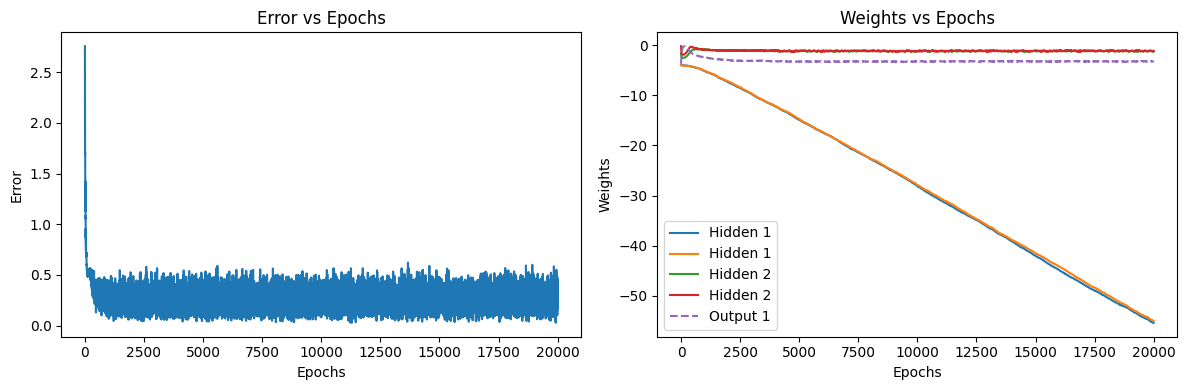

[0, 0] [-0.20614803] [-0.]
[0, 1] [0.66785112] [1.]
[1, 0] [0.76246918] [1.]
[1, 1] [0.17997732] [0.]
Final Hidden Weights:
[[-55.36312195  -1.23351097]
 [-54.99460953  -1.14010037]]

Final Output Weights:
[[-3.20188292]
 [ 3.37192819]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def outputDetector(actual_output):
  # Find the minimum and maximum values
  min_value = min(actual_output)
  max_value = max(actual_output)

  # Create a new array with corresponding elements
  new_array = [0 if element == min_value else 1 if element == max_value else element for element in actual_output]

  return new_array
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1.0 - x)

def add_gaussian_noise_to_sigmoid(x, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=x.shape)
    return sigmoid(x) + noise

def modified_sigmoid_prime(x):
    return sigmoid_prime(x) * (1.0 + np.random.normal(0, 0.1, size=x.shape))

epochs = 20000
input_size, hidden_size, output_size = 2, 2, 1
learning_rate = 0.05
noise_std = 0.1

# Truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Set the bounds for the uniform distribution
lower_bound = -5
upper_bound = 5

# Fill hidden and output layers with random values.
w_hidden = np.round(np.random.uniform(lower_bound, upper_bound, size=(input_size, hidden_size)), 1)
w_output = np.round(np.random.uniform(lower_bound, upper_bound, size=(hidden_size, output_size)), 1)
# Print final weights
print("initial Hidden Weights:")
print(w_hidden)

print("\ninitial Output Weights:")
print(w_output)

# Lists to store errors, hidden weights, and output weights for each epoch
errors = []
hidden_weights_history = []
output_weights_history = []

# Learning iteration
for epoch in range(epochs):
    # Forward propagation
    actual_hidden = add_gaussian_noise_to_sigmoid(np.dot(X, w_hidden))
    output = np.dot(actual_hidden, w_output)

    # Calculate error (expected output - calculated output)
    error = Y - output
    errors.append(np.mean(np.abs(error)))  # Save the mean absolute error for each epoch

    # Backward Propagation
    dZ = error * learning_rate
    w_output += actual_hidden.T.dot(dZ)

    dH = dZ.dot(w_output.T) * modified_sigmoid_prime(actual_hidden)
    w_hidden += X.T.dot(dH)

    # Save weights for each epoch
    hidden_weights_history.append(np.copy(w_hidden))
    output_weights_history.append(np.copy(w_output))

# Plot errors versus epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')

# Plot hidden weights and output weights
plt.subplot(1, 2, 2)
hidden_weights_history = np.array(hidden_weights_history)
output_weights_history = np.array(output_weights_history)

for i in range(hidden_size):
    plt.plot(range(epochs), hidden_weights_history[:, :, i], label=f'Hidden {i + 1}')

for i in range(output_size):
    plt.plot(range(epochs), output_weights_history[:, i], label=f'Output {i + 1}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Weights vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

# Test the final trained network
actual_hidden = add_gaussian_noise_to_sigmoid(np.dot([0, 0], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[0, 0]', actual_output, np.round(actual_output))

actual_hidden = add_gaussian_noise_to_sigmoid(np.dot([0, 1], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[0, 1]', actual_output, np.round(actual_output))

actual_hidden = add_gaussian_noise_to_sigmoid(np.dot([1, 0], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[1, 0]', actual_output, np.round(actual_output))

actual_hidden = add_gaussian_noise_to_sigmoid(np.dot([1, 1], w_hidden))
actual_output = np.dot(actual_hidden, w_output)
print('[1, 1]', actual_output, np.round(actual_output))

# Print final weights
print("Final Hidden Weights:")
print(w_hidden)

print("\nFinal Output Weights:")
print(w_output)

